# <font color='blue'>Data Science Academy - Python Fundamentos - Capítulo 10</font>

## Download: http://github.com/dsacademybr

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.7.6


# Lab 4 - Construindo um Modelo de Regressão Linear com TensorFlow

Use como referência o Deep Learning Book: http://www.deeplearningbook.com.br/

Obs: Embora a versão 2.x do TensorFlow já esteja disponível, este Jupyter Notebook usar a versão 1.15, que também é mantida pela equipe do Google.

Caso queira aprender TensorFlow 2.0, esta versão já está disponível nos cursos da Formação IA, aqui na DSA.

Execute a célula abaixo para instalar o TensorFlow na sua máquina.

In [1]:
# Versão do TensorFlow a ser usada 
# !pip install -q tensorflow

In [10]:
# Imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

tf.__version__

'1.15.2'

## Definindo os hyperparâmetros do modelo

In [11]:
# Hyperparâmetros do modelo
learning_rate = 0.01
training_epochs = 2000
display_step = 200

## Definindo os datasets de treino e de teste

## Considere X como o tamanho de uma casa e y o preço de uma casa

In [12]:
# Dataset de treino
train_X = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_y = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]
 
# Dataset de teste
test_X = np.asarray([6.83, 4.668, 8.9, 7.91, 5.7, 8.7, 3.1, 2.1])
test_y = np.asarray([1.84, 2.273, 3.2, 2.831, 2.92, 3.24, 1.35, 1.03])

## Placeholders e variáveis

In [13]:
# Placeholders para as variáveis preditoras (x) e para  variável target (y)
X = tf.placeholder(tf.float32)
y = tf.placeholder(tf.float32)
 
# Pesos e bias do modelo
W = tf.Variable(np.random.randn(), name="weight")
b = tf.Variable(np.random.randn(), name="bias")

## Construindo o modelo

In [14]:
# Construindo o modelo linear
# Fórmula do modelo linear: y = W*X + b
linear_model = W*X + b
 
# Mean squared error (erro quadrado médio)
cost = tf.reduce_sum(tf.square(linear_model - y)) / (2*n_samples)
 
# Otimização com Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

## Executando o grafo computacional, treinando e testando o modelo

Epoch:   200 	 Custo (Erro):    0.1228 	 W:0.3731 	 b:-0.06206
Epoch:   400 	 Custo (Erro):    0.1051 	 W:0.3469 	 b:0.1236
Epoch:   600 	 Custo (Erro):   0.09429 	 W:0.3263 	 b:0.2692
Epoch:   800 	 Custo (Erro):   0.08761 	 W:0.3102 	 b:0.3834
Epoch:  1000 	 Custo (Erro):    0.0835 	 W:0.2976 	 b: 0.473
Epoch:  1200 	 Custo (Erro):   0.08097 	 W:0.2877 	 b:0.5433
Epoch:  1400 	 Custo (Erro):   0.07942 	 W:0.2799 	 b:0.5984
Epoch:  1600 	 Custo (Erro):   0.07846 	 W:0.2738 	 b:0.6416
Epoch:  1800 	 Custo (Erro):   0.07787 	 W: 0.269 	 b:0.6755
Epoch:  2000 	 Custo (Erro):   0.07751 	 W:0.2653 	 b:0.7021

Otimização Concluída!
Custo Final de Treinamento: 0.07750776  - W Final: 0.26527604  - b Final: 0.702092 



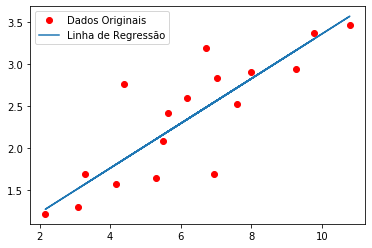

Custo Final em Teste: 0.07615927
Diferença Média Quadrada Absoluta: 0.001348488


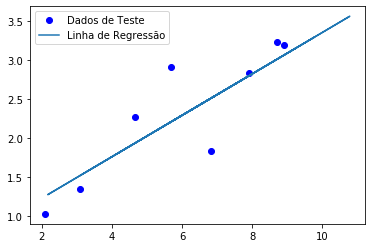

In [15]:
# Definindo a inicialização das variáveis
init = tf.global_variables_initializer()
 
# Iniciando a sessão
with tf.Session() as sess:
    # Iniciando as variáveis
    sess.run(init)
 
    # Treinamento do modelo
    for epoch in range(training_epochs):
 
        # Otimização com Gradient Descent
        sess.run(optimizer, feed_dict={X: train_X, y: train_y})
         
        # Display de cada epoch
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, y: train_y})
            print("Epoch:{0:6} \t Custo (Erro):{1:10.4} \t W:{2:6.4} \t b:{3:6.4}".format(epoch+1, c, sess.run(W), sess.run(b)))
             
    # Imprimindo os parâmetros finais do modelo
    print("\nOtimização Concluída!")
    training_cost = sess.run(cost, feed_dict={X: train_X, y: train_y})
    print("Custo Final de Treinamento:", training_cost, " - W Final:", sess.run(W), " - b Final:", sess.run(b), '\n')
     
    # Visualizando o resultado
    plt.plot(train_X, train_y, 'ro', label='Dados Originais')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
 
    # Testando o modelo
    testing_cost = sess.run(tf.reduce_sum(tf.square(linear_model - y)) / (2 * test_X.shape[0]), 
                            feed_dict={X: test_X, y: test_y})
     
    print("Custo Final em Teste:", testing_cost)
    print("Diferença Média Quadrada Absoluta:", abs(training_cost - testing_cost))
 
    # Display em Teste
    plt.plot(test_X, test_y, 'bo', label='Dados de Teste')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Linha de Regressão')
    plt.legend()
    plt.show()
    
sess.close()

Conheça a Formação Inteligência Artificial, um programa completo, 100% online e 100% em português, com 402 horas em 9 cursos de nível intermediário/avançado, que vão ajudá-lo a se tornar um dos profissionais mais cobiçados do mercado de tecnologia. Clique no link abaixo, faça sua inscrição, comece hoje mesmo e aumente sua empregabilidade:

https://www.datascienceacademy.com.br/pages/formacao-inteligencia-artificial

# Fim

### Obrigado - Data Science Academy - <a href="http://facebook.com/dsacademybr">facebook.com/dsacademybr</a>